# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [87]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [7]:
states_data = pd.read_csv("/Users/alexdev/Desktop/2023-Tutorials-main/data/states_edu.csv")
states_data.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [21]:
states_data.dropna()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,outcome score
561,2003_ALABAMA,ALABAMA,2003,727900.0,5196054.0,567704.0,2966981.0,1661369.0,5298932.0,2817111.0,...,59663.0,42005.0,466920.0,205907.0,731220.0,223.0,262.0,207.0,253.0,236.25
562,2003_ALASKA,ALASKA,2003,133303.0,1425948.0,259423.0,813371.0,353154.0,1610289.0,763525.0,...,11140.0,8651.0,82337.0,40238.0,133933.0,233.0,279.0,212.0,256.0,245.00
563,2003_ARIZONA,ARIZONA,2003,875111.0,6529894.0,740579.0,2912629.0,2876686.0,6210287.0,2810907.0,...,76376.0,68815.0,613442.0,307272.0,1012068.0,229.0,271.0,209.0,255.0,241.00
564,2003_ARKANSAS,ARKANSAS,2003,450158.0,3241275.0,379947.0,2394336.0,466992.0,3242799.0,1768713.0,...,37004.0,28840.0,281834.0,132712.0,454523.0,229.0,266.0,214.0,258.0,241.75
565,2003_CALIFORNIA,CALIFORNIA,2003,6226552.0,59815855.0,5795655.0,33617766.0,20402434.0,59749885.0,29561563.0,...,500143.0,395194.0,3929869.0,1854518.0,6413867.0,227.0,267.0,206.0,251.0,237.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219,2015_VIRGINIA,VIRGINIA,2015,1279867.0,15857524.0,1012205.0,6240349.0,8604970.0,16113212.0,8755896.0,...,95221.0,90391.0,772414.0,386781.0,1283590.0,247.0,288.0,229.0,267.0,257.75
1220,2015_WASHINGTON,WASHINGTON,2015,1072359.0,13709442.0,1036422.0,8293812.0,4379208.0,13630138.0,6508964.0,...,79483.0,89258.0,656797.0,336808.0,1087030.0,245.0,287.0,226.0,267.0,256.25
1221,2015_WEST_VIRGINIA,WEST_VIRGINIA,2015,279565.0,3478401.0,362959.0,1979466.0,1135976.0,3466981.0,1819903.0,...,20426.0,18432.0,162070.0,80142.0,277452.0,235.0,271.0,216.0,260.0,245.50
1222,2015_WISCONSIN,WISCONSIN,2015,861813.0,11637376.0,814385.0,5869265.0,4953726.0,11553677.0,5723474.0,...,61084.0,66253.0,489919.0,263896.0,867800.0,243.0,289.0,223.0,270.0,256.25


<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: *OUTCOME_SCORE*

How many years of data are logged in our dataset? 

In [9]:
years = states_data.groupby("YEAR")
years.ngroups

33

Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [25]:
states_data["OUTCOME_SCORE"] = (states_data["AVG_MATH_4_SCORE"]+states_data["AVG_MATH_8_SCORE"]+states_data["AVG_READING_4_SCORE"]+states_data["AVG_READING_8_SCORE"])/4
states = states_data.groupby("STATE")
states["OUTCOME_SCORE"].mean()

STATE
ALABAMA                 241.416667
ALASKA                  245.750000
ARIZONA                 245.638889
ARKANSAS                246.361111
CALIFORNIA              242.833333
COLORADO                255.083333
CONNECTICUT             256.194444
DELAWARE                252.027778
DISTRICT_OF_COLUMBIA    231.361111
DODEA                   259.138889
FLORIDA                 251.222222
GEORGIA                 248.138889
HAWAII                  244.666667
IDAHO                   253.138889
ILLINOIS                250.583333
INDIANA                 254.611111
IOWA                    253.944444
KANSAS                  254.694444
KENTUCKY                251.166667
LOUISIANA               241.138889
MAINE                   254.750000
MARYLAND                253.750000
MASSACHUSETTS           263.361111
MICHIGAN                249.111111
MINNESOTA               258.388889
MISSISSIPPI             240.472222
MISSOURI                251.750000
MONTANA                 255.833333
NATIONAL      

Find the average for your outcome score across all states in 2019

In [43]:
years["OUTCOME_SCORE"].mean()

YEAR
1986           NaN
1987           NaN
1988           NaN
1989           NaN
1990           NaN
1991           NaN
1992    241.250000
1993           NaN
1994           NaN
1995           NaN
1996           NaN
1997           NaN
1998           NaN
1999           NaN
2000           NaN
2001           NaN
2002           NaN
2003    247.773585
2004           NaN
2005    248.783019
2006           NaN
2007    250.702830
2008           NaN
2009    251.476415
2010           NaN
2011    252.311321
2012           NaN
2013    253.476415
2014           NaN
2015    252.433962
2016           NaN
2017    252.160377
2019    250.891509
Name: OUTCOME_SCORE, dtype: float64

Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [46]:
states["OUTCOME_SCORE"].max()

STATE
ALABAMA                 244.50
ALASKA                  248.25
ARIZONA                 249.75
ARKANSAS                249.75
CALIFORNIA              246.75
COLORADO                258.75
CONNECTICUT             258.75
DELAWARE                254.25
DISTRICT_OF_COLUMBIA    242.00
DODEA                   264.25
FLORIDA                 255.00
GEORGIA                 251.50
HAWAII                  249.75
IDAHO                   254.25
ILLINOIS                252.50
INDIANA                 258.25
IOWA                    256.00
KANSAS                  257.50
KENTUCKY                254.25
LOUISIANA               243.25
MAINE                   257.25
MARYLAND                259.50
MASSACHUSETTS           266.00
MICHIGAN                250.00
MINNESOTA               261.50
MISSISSIPPI             247.50
MISSOURI                254.50
MONTANA                 258.75
NATIONAL                254.25
NEBRASKA                256.75
NEVADA                  247.50
NEW_HAMPSHIRE           263.75
NE

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [48]:
states_data["INSTRUCTION_EXPENDITURE_PER_STUDENT"] = states_data["INSTRUCTION_EXPENDITURE"] / states_data["ENROLL"]
states_data.dropna().head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,outcome score,OUTCOME_SCORE,INSTRUCTION_EXPENDITURE_PER_STUDENT
561,2003_ALABAMA,ALABAMA,2003,727900.0,5196054.0,567704.0,2966981.0,1661369.0,5298932.0,2817111.0,...,466920.0,205907.0,731220.0,223.0,262.0,207.0,253.0,236.25,236.25,3.870190
562,2003_ALASKA,ALASKA,2003,133303.0,1425948.0,259423.0,813371.0,353154.0,1610289.0,763525.0,...,82337.0,40238.0,133933.0,233.0,279.0,212.0,256.0,245.00,245.00,5.727741
563,2003_ARIZONA,ARIZONA,2003,875111.0,6529894.0,740579.0,2912629.0,2876686.0,6210287.0,2810907.0,...,613442.0,307272.0,1012068.0,229.0,271.0,209.0,255.0,241.00,241.00,3.212058
564,2003_ARKANSAS,ARKANSAS,2003,450158.0,3241275.0,379947.0,2394336.0,466992.0,3242799.0,1768713.0,...,281834.0,132712.0,454523.0,229.0,266.0,214.0,258.0,241.75,241.75,3.929094
565,2003_CALIFORNIA,CALIFORNIA,2003,6226552.0,59815855.0,5795655.0,33617766.0,20402434.0,59749885.0,29561563.0,...,3929869.0,1854518.0,6413867.0,227.0,267.0,206.0,251.0,237.75,237.75,4.747662


Feature engineering justification: I created a feature: "instruction expenditure per student." I think the more money spent on instruction per student, the higher their average outcome score will be.

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

<Axes: xlabel='INSTRUCTION_EXPENDITURE_PER_STUDENT', ylabel='OUTCOME_SCORE'>

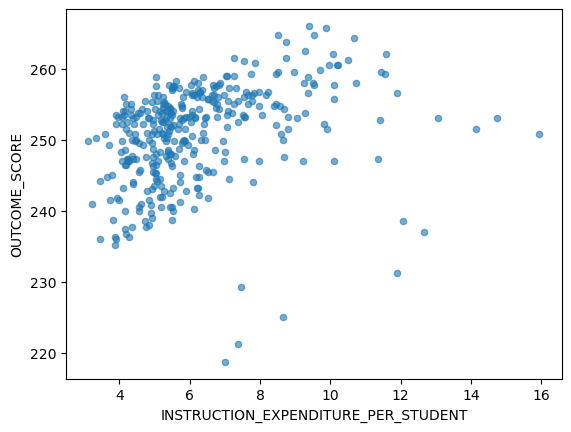

In [51]:
states_data.plot.scatter(x='INSTRUCTION_EXPENDITURE_PER_STUDENT', y='OUTCOME_SCORE', alpha=0.6)

The instruction expenditure per student seems to have a correlation with the outcome score for instruction expenditures per student between 4 and 10. With instruction expenditures per student greater than 10, the correlation does not exist, as these are likely due to significantly lower enrollments.

**Visualization 2**

<Axes: xlabel='ENROLL', ylabel='OUTCOME_SCORE'>

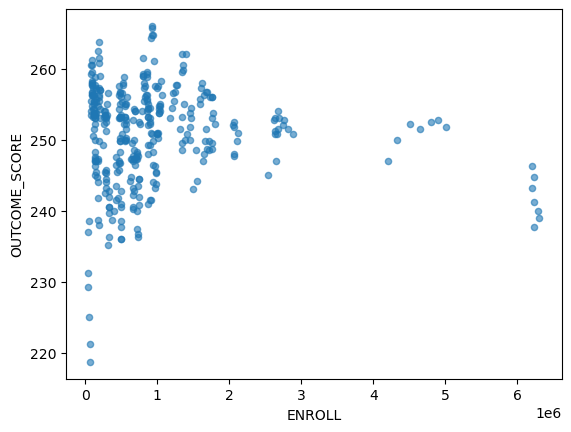

In [77]:
states_data.plot.scatter(x='ENROLL', y='OUTCOME_SCORE', alpha = 0.6)

The states with lower enrollments tend to score higher on average on the math and reading exams than states with higher enrollments.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
X = states_data[['ENROLL', 'INSTRUCTION_EXPENDITURE_PER_STUDENT']].dropna() 
y = states_data.loc[X.index]['OUTCOME_SCORE']
y.fillna(y.median(), inplace=True)

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [95]:
from sklearn.linear_model import LinearRegression

In [96]:
# create your model here
model = LinearRegression()

In [97]:
model.fit(X_train, y_train)

LinearRegression()

In [98]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [99]:
print(model.score(X_test, y_test))
print(np.mean(np.abs(model.predict(X_test)-y_test)))

-0.007221329744717231
1.837133979034223


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

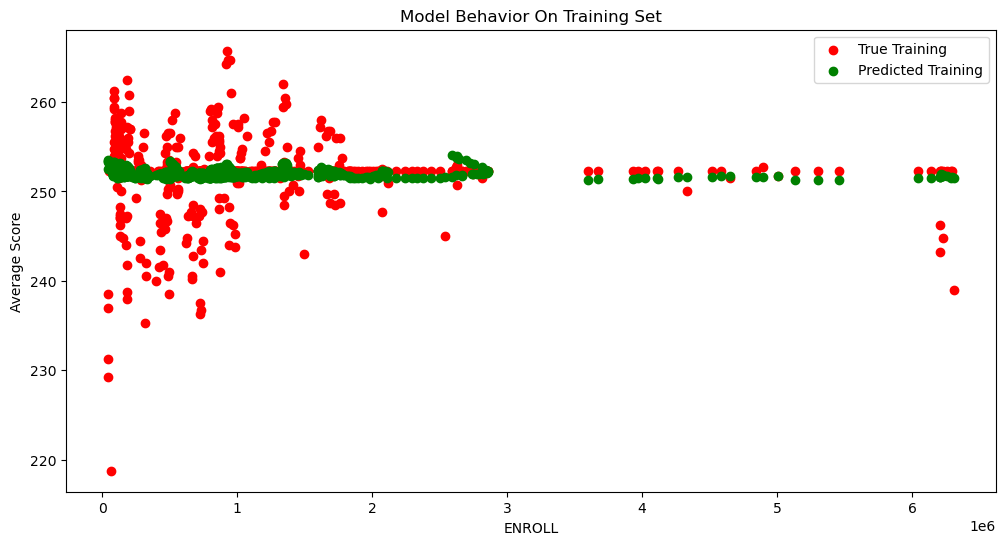

In [100]:
col_name = 'ENROLL'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Average Score')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

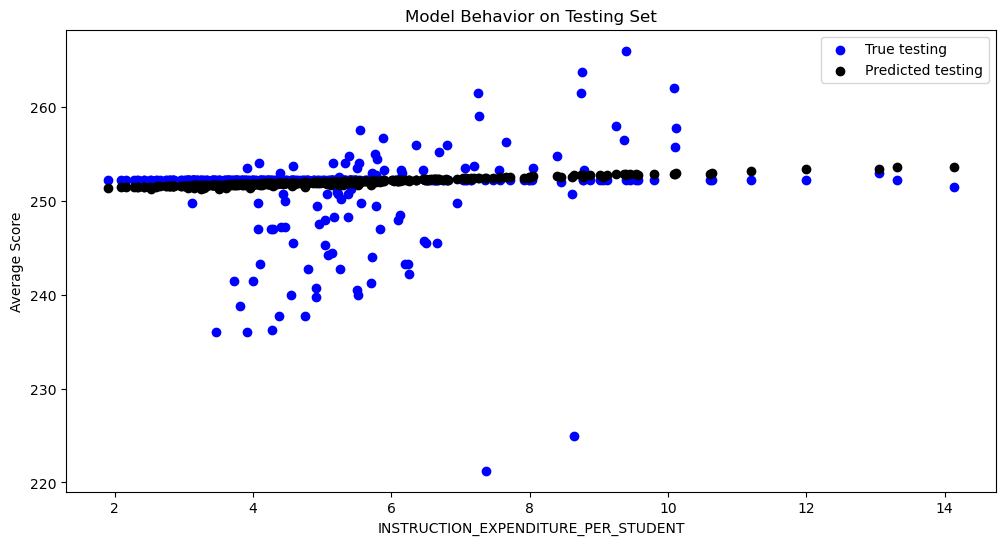

In [101]:
col_name = 'INSTRUCTION_EXPENDITURE_PER_STUDENT'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Average Score')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

With the dataset, I tested how the enrollment and instruction expense per student (amount of money spent on instruction divided by the number of students) correlated with the average scores of students from each state on their 4th and 8th grade math and reading exams. From these tests, I found that states with lower enrollments tend to score higher on their math and reading exams. I also found that for a range of instructional expenditures per student, with an increase in instruction expenditure, the average score increases. However, this correlation dropped off as the instructional expenditure got too high, as these were likely due to states with significantly lower enrollments. I also created a linear regression model to predict the average score given a state's enrollment or instruction expenditure per student, both of which worked fairly well as most of the predictions were close to the majority of the data points.